In [1]:
# Importing Package

#tables and data manipulation
import pandas as pd
import numpy as np
from pandas import Timestamp

import warnings
warnings.filterwarnings("ignore")

#date
import datetime

#plots
import matplotlib.pyplot as plt

#stats
from scipy import stats

from math import *

In [2]:
!python -V

Python 3.8.3


In [3]:
# Importing Data - HOME
account = pd.read_csv('C:\\Users\\LORIS\\PycharmProjects\\mansa\\input\\accounts.csv', sep=",", encoding = "utf8")
transaction = pd.read_csv('C:\\Users\\LORIS\\PycharmProjects\\mansa\\input\\transactions.csv', sep=",", encoding = "utf8")

In [4]:
#To have all the types of each variables

print(transaction.info())
print(account.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518229 entries, 0 to 518228
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   account_id  518229 non-null  int64  
 1   date        518229 non-null  object 
 2   amount      518229 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1254 non-null   int64  
 1   balance      1254 non-null   float64
 2   update_date  1254 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 29.5+ KB
None


In [5]:
account.head(5)

id  balance update_date
0   0    13.63  2021-07-02
1   1    12.91  2021-07-02
2   2    19.84  2021-07-02
3   3   130.00  2021-07-02
4   4  2806.75  2021-07-02

In [6]:
#So we see that the type of the date variable is not correct. We can change that by convert with pd.to_datetime

transaction["date"] = pd.to_datetime(transaction["date"])
account["update_date"] = pd.to_datetime(account["update_date"])

In [7]:
#it's good for the suites

print(transaction.info())
print(account.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518229 entries, 0 to 518228
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   account_id  518229 non-null  int64         
 1   date        518229 non-null  datetime64[ns]
 2   amount      518229 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1254 non-null   int64         
 1   balance      1254 non-null   float64       
 2   update_date  1254 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 29.5 KB
None


# the first step : cleaning the data to have a better understanding

In [8]:
transaction['amount'].describe()

count    518229.000000
mean          4.004732
std        1975.049174
min     -351200.000000
25%         -55.780000
50%         -15.000000
75%          -1.200000
max      452097.000000
Name: amount, dtype: float64

###  In the transaction's data :  We see that the majority of transaction are debit (because at least 75% of transaction are negative).

In [9]:
account['balance'].describe()

count      1254.000000
mean       2495.186994
std       11853.402866
min      -98240.370000
25%           1.132500
50%          72.065000
75%        1083.257500
max      216975.660000
Name: balance, dtype: float64

### Visualisation of one example. We take the first.

In [10]:
account_1 = account.head(1)
transaction_1 = transaction[transaction["account_id"]==0]

In [11]:
account_2 = account[account["id"]==1]
transaction_2 = transaction[transaction["account_id"]==1]

## We see few values equal to 0. This can be add some noise in the data. 

In [12]:
sum(transaction_1['amount']==0)

75

Text(0, 0.5, 'Amount of each transaction')

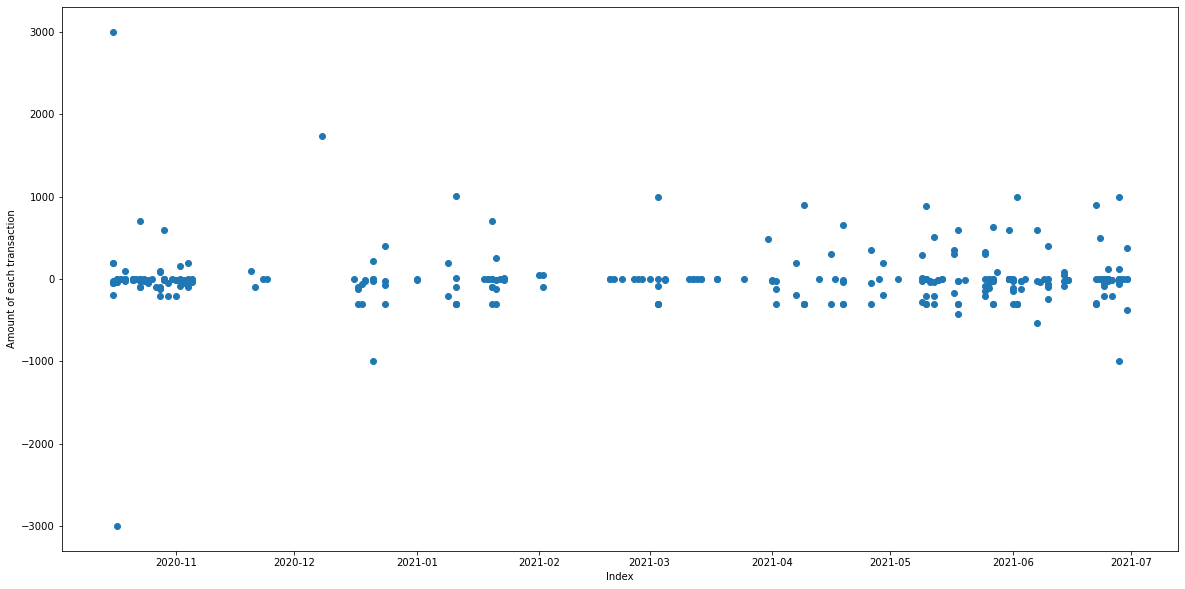

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(transaction_1["date"], transaction_1["amount"])
plt.xlabel("Index")
plt.ylabel("Amount of each transaction")

##### This plot is interresting. This is the first plot so it's ok because we want just visualize the representation of data
##### Let's see how the data behaves when removing transactions equal to 0.

In [14]:
transaction_1_remove_zero = transaction_1.drop(transaction_1[transaction_1.amount == 0].index)

In [15]:
print("max : "+str(transaction_1_remove_zero["amount"].max()))
print("min : "+str(transaction_1_remove_zero["amount"].min()))

max : 3000.0
min : -3000.0


Text(0, 0.5, 'Amount of each transaction')

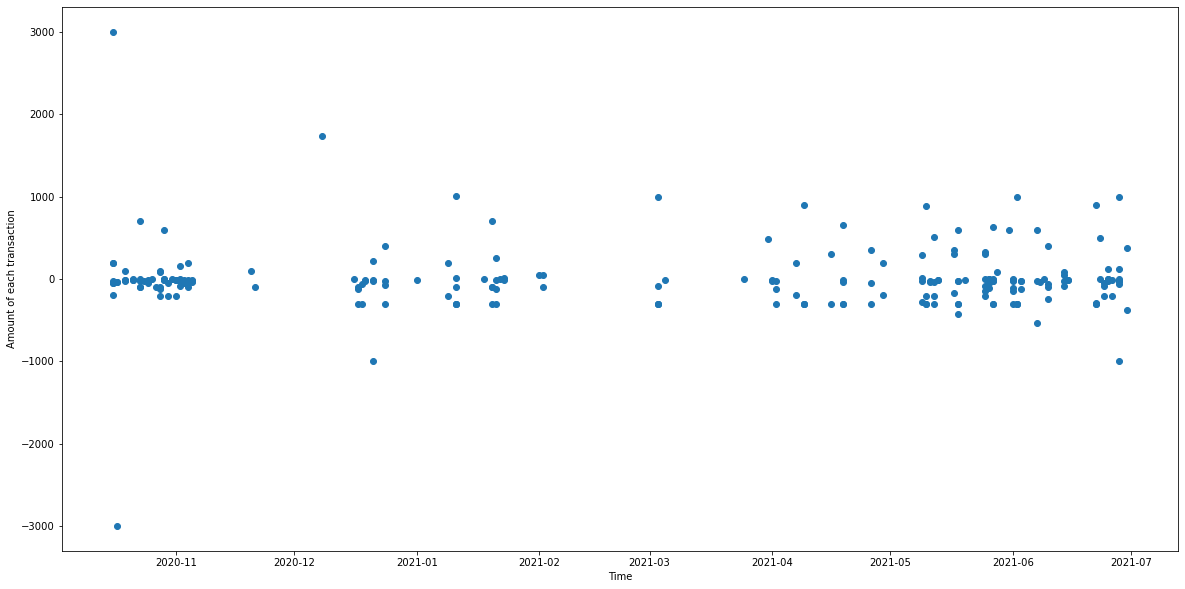

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(transaction_1_remove_zero['date'], transaction_1_remove_zero["amount"])
plt.xlabel("Time")
plt.ylabel("Amount of each transaction")

## We can see that representation is sparse. 
## Reminder : Approach the outgoing value so, it's interesting to remove positive value in the dataset and "group by" by date

In [17]:
transaction_1_without_positive = transaction_1.drop(transaction_1[transaction_1.amount >= 0].index)

In [18]:
transaction_1_without_positive.shape

(182, 3)

Text(0, 0.5, 'Amount of each transaction')

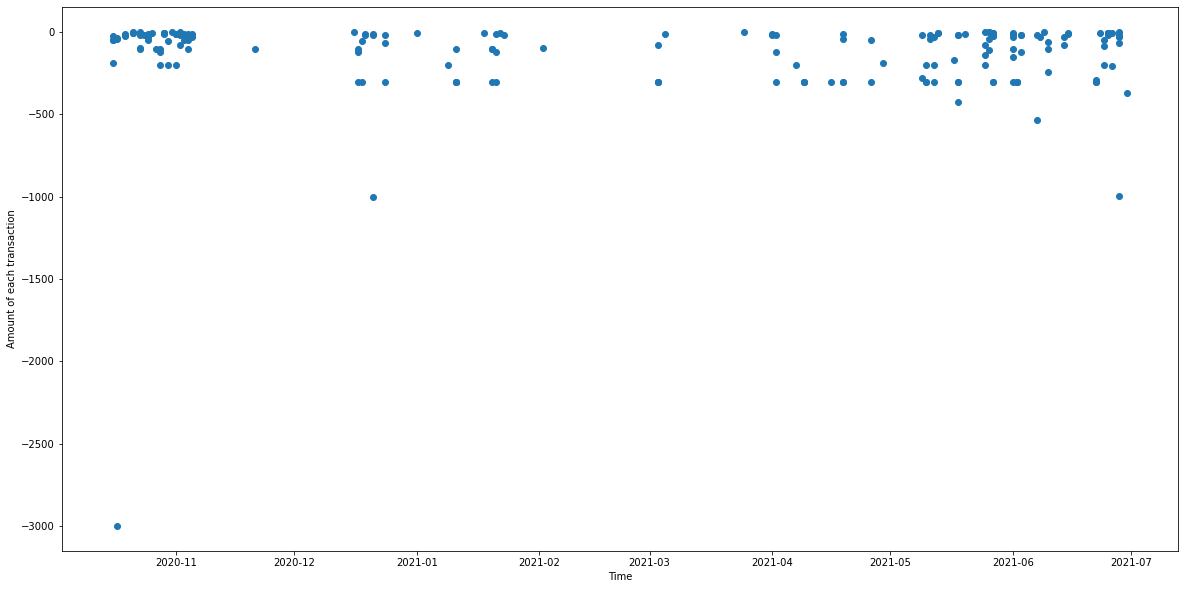

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(transaction_1_without_positive['date'], transaction_1_without_positive["amount"])
plt.xlabel("Time")
plt.ylabel("Amount of each transaction")

In [20]:
transaction_1_without_positive['monthly'] = transaction_1_without_positive['date'].dt.year.astype(str) + transaction_1_without_positive['date'].dt.month.map("{:02}".format).astype(str)

In [21]:
transaction_1_without_positive

account_id       date  amount monthly
1             0 2020-10-16  -192.0  202010
3             0 2020-10-16   -24.0  202010
4             0 2020-10-16   -50.0  202010
5             0 2020-10-16   -48.0  202010
7             0 2020-10-17   -42.0  202010
..          ...        ...     ...     ...
299           0 2021-06-28  -996.0  202106
302           0 2021-06-28   -30.0  202106
303           0 2021-06-28   -20.0  202106
304           0 2021-06-28   -65.0  202106
309           0 2021-06-30  -371.9  202106

[182 rows x 4 columns]

In [22]:
transaction_1_without_positive_groupby = transaction_1_without_positive.groupby(['monthly']).sum()

In [23]:
transaction_1_without_positive_groupby

account_id   amount
monthly                     
202010            0 -4651.98
202011            0  -801.02
202012            0 -2344.82
202101            0 -2188.46
202102            0  -100.00
202103            0 -1000.70
202104            0 -3089.20
202105            0 -4235.94
202106            0 -5815.39

In [24]:
transaction_1_without_positive_groupby.shape

(9, 2)

Text(0, 0.5, 'Amount of each transaction')

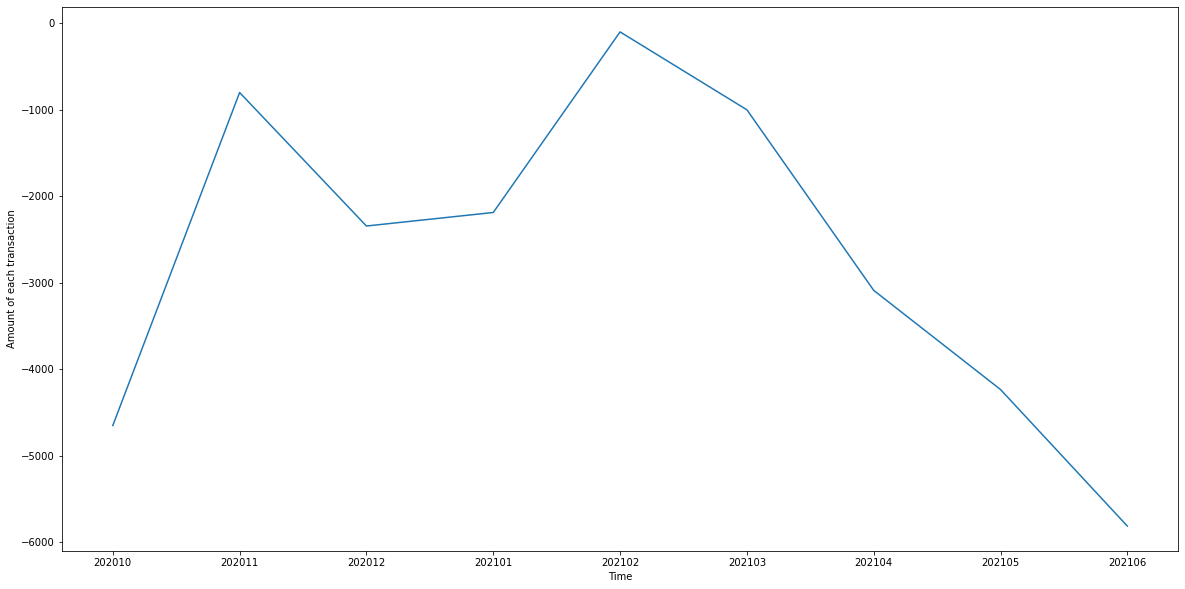

In [25]:
plt.figure(figsize=(20,10))
plt.plot(transaction_1_without_positive_groupby.index, transaction_1_without_positive_groupby["amount"])
plt.xlabel("Time")
plt.ylabel("Amount of each transaction")

In [26]:
#Remove outliers of dataset with Scipy.stats : Z-score ; If Z-score is > 3 then we delete the observation

In [27]:
transaction_1_without_positive_groupby['z_score'] = stats.zscore(transaction_1_without_positive_groupby['amount'])
transaction_1_without_positive_groupby_outliers = transaction_1_without_positive_groupby.loc[transaction_1_without_positive_groupby['z_score'].abs()<=3]

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(transaction_1_without_positive_groupby_outliers.index, transaction_1_without_positive_groupby_outliers["amount"])
plt.xlabel("Time")
plt.ylabel("Amount of each transaction")

Text(0, 0.5, 'Amount of each transaction')

# Now, we can make multiple functions to : 
- build dataset which reverse the balance of the account account back through time
- preprocessing the dataset
- only keep 180 days in datasets

# We can create a function to prepare the new datasets :
    - drop duplicate row
    - drop amount equal to 0
    - only keep id with >= 180days (~6month) of history
    - drop outliers
    - We only have 1 variable for time-serie so we don't make statistical analysis with several variables
    - Manage missing values (fillna?)
    - Transform Categorical to Numeric (Not for us)

In [29]:
def preprocessing(data):
    
    print("Start with : "+str(data.shape))
    
    #drop duplicates
    data = data.drop_duplicates()
    print("After drop duplicate : "+str(data.shape))
    
    #drop amount equal to 0
    data = data.drop(data[data.amount == 0].index)
    print("After amount equal to 0 : "+str(data.shape))
    
    #drop outliers
    data['z_score'] = stats.zscore(data['amount'])
    data.drop(data[data['z_score'] > 3].index)
    del data['z_score']
    print("After drop outliers : "+str(data.shape))
    
    return data

In [30]:
transaction_pp = preprocessing(transaction)

Start with : (518229, 3)
After drop duplicate : (489568, 3)
After amount equal to 0 : (483763, 3)
After drop outliers : (483763, 3)


In [31]:
def calculate_indic(transaction, account):
    
    # Calculate number of transaction per person
    data_transac = transaction.groupby("account_id").size()
    
    # Calculate history of transaction (max - min)
    tab_temp = []
    for i in transaction['account_id'].unique():
        tab_temp.append((account[account['id'] == i]['update_date'].max() - transaction[transaction['account_id'] == i]['date'].min()).days) 
        
    data_out = pd.DataFrame(data=data_transac, columns=["nb_transac"])
    data_out.insert(1, "histo_transac",tab_temp)
    
    return data_out

In [32]:
indics = calculate_indic(transaction_pp, account)

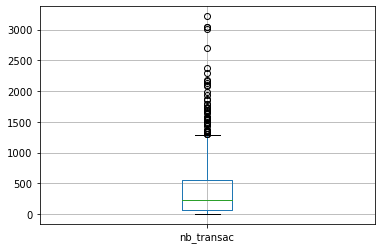

In [33]:
indics.boxplot(column="nb_transac")

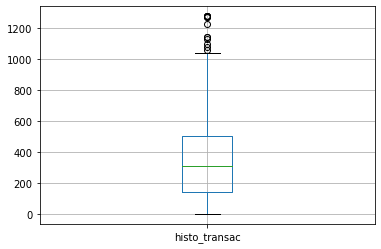

In [34]:
indics.boxplot(column="histo_transac")

#### Creation of a graph to highlight the 180 days (number of transactions & transaction history)

In [35]:
#histo_transac
quant_histo_transac = []
for i in np.arange(0,1,0.01):
    quant_histo_transac.append(indics['histo_transac'].quantile(i))
    
quant_nb_transac = []
for i in np.arange(0,1,0.01):
    quant_nb_transac.append(indics['nb_transac'].quantile(i))

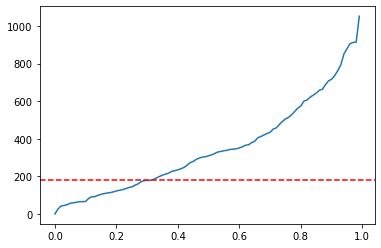

In [36]:
plt.plot(np.arange(0,1,0.01), quant_histo_transac)
plt.axhline(y=180, color='red', linestyle='--')

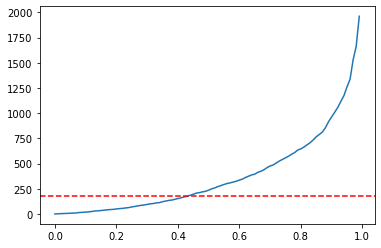

In [37]:
plt.plot(np.arange(0,1,0.01), quant_nb_transac)
plt.axhline(y=180, color='red', linestyle='--')

## We can see that the data pruning is going to be significant. In fact, If we delete the id's with less than 180 days of history, this represents approximatively 30/35%
## Also, we calculated the number of transactions because we don't want the id's with more 180days of history and very poor total of transactions

In [38]:
def keep_180days_history(data_transaction, data_account, indics):
    """
    Keep id's with more 180 days of history in data_transaction and data_account
    """
    
    transaction_restreint = data_transaction.loc[data_transaction['account_id'].isin(indics.loc[indics['histo_transac'] >= 180,:].index)]
    account_restreint = data_account.loc[data_account['id'].isin(indics.loc[indics['histo_transac'] >= 180,:].index)]
    
    return account_restreint, transaction_restreint

In [39]:
account_restreint, transaction_resreint = keep_180days_history(transaction_pp, account, indics)

In [40]:
print(transaction_resreint.shape)
print(account_restreint.shape)
print("We remove "+str(account.shape[0] - account_restreint.shape[0])+" id's")

(437036, 3)
(859, 3)
We remove 395 id's


In [41]:
quant_nb_transac_2 = []
for i in np.arange(0,1,0.01):
    quant_nb_transac_2.append(indics.loc[indics['histo_transac'] >= 180,:].quantile(i))

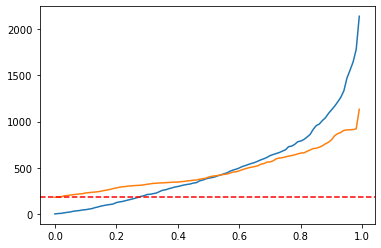

In [42]:
plt.plot(np.arange(0,1,0.01), quant_nb_transac_2)
plt.axhline(y=180, color='red', linestyle='--')

## we can notice that:
- the fact of deleting the id with less history has an interesting effect on the number of transactions

# Construction of 2 working bases:
- a base to reconstruct the balance of each account over time
- a base to realize the daily outgoing per person

In [43]:
def database_outgoing(transaction, account, keep=6):
    
    #keep only amount negative
    c0 = transaction.loc[transaction['amount'] < 0,:]
    
    #groupby per id
    c1 = c0.groupby(['date','account_id']).sum()
    
    #rebuild base
    c2 = c1.reset_index()
    
    #build month - 30days
    c3 = c2.merge(account[["id","update_date"]], left_on='account_id', right_on = 'id', how='left').drop(columns=["id"])
    c3["int_30"] = (((c3["update_date"] - c3["date"]).dt.days)/30).astype(int)
    
    #keep only 6 months
    c4 = c3[c3["int_30"] <= keep].drop(columns=["date","update_date"])
    
    #group by int30
    c5 = c4.groupby(['int_30','account_id']).sum()
    
    #rebuild base
    c6 = c5.reset_index()

    return c6, c3

In [44]:
base_outgoing_30, base_outgoing_daily = database_outgoing(transaction_resreint, account_restreint, 12)

# base_outgoing2 = database_outgoing(transaction_resreint, account_restreint)

In [46]:
def build_balance_history(transaction, account, keep=12):
    
    x = pd.DataFrame()
    
    for i in account_restreint["id"].unique():

        # Browse each id
        temp_data = transaction[transaction["account_id"] == i]
        
        #We continue
        temp_data2 = temp_data[["date","amount"]].groupby(['date']).mean()

        #Reverse date
        temp_data3 = temp_data2.sort_values(by='date', ascending=False)

        #Reserve sign
        temp_data3["amount"] = - temp_data3["amount"]

        #Add amount of last date
        temp_data3["amount"][0] = temp_data3["amount"][0] + account[account["id"] == i ]['balance']

        #Calculation of cumsum
        temp_reverse = np.cumsum(temp_data3["amount"].values)

        #Add in dataset
        temp_data3.insert(1, "balance", temp_reverse)
        temp_data3.insert(1, "id", i)

        temp_data3 = temp_data3[["id","balance"]]

        #Reset Index for date
        temp_data3 = temp_data3.reset_index()
        
        #Concat every id's resultat
        x = x.append(temp_data3)
        
    x1 = x.merge(account[["id","update_date"]], on='id', how='left')
    x1["int_30"] = (((x1["update_date"] - x1["date"]).dt.days)/30).astype(int)
    x2 = x1[x1["int_30"] <= keep].drop(columns=["date","update_date"])
    x3= x2.groupby(['int_30','id']).mean()
    x4 = x3.reset_index()
    
    return x4

In [51]:
base_balance = build_balance_history(transaction_resreint, account_restreint, 12)

In [52]:
base_balance_0 = base_balance[base_balance["id"] == 0]

In [53]:
base_balance_0 = base_balance_0.sort_values(by='int_30', ascending=True)

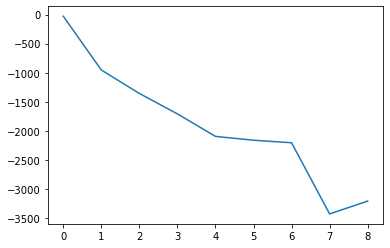

In [54]:
plt.plot(range(0,len(list(base_balance_0["balance"].values))), list(base_balance_0["balance"].values))

# Next : we have create 2 bases for 2 differents models

In [ ]:
# base_outgoing_test1 = base_outgoing
# base_outgoing_test = base_outgoing_test1
# base_prophet = base_outgoing[base_outgoing["account_id"]==1248]
# base_prophet_test = base_prophet.drop(columns=["account_id"])
# base_prophet_test = base_prophet_test.rename(columns={"amount":"y", "date":"ds"})
# base_prophet_test["y"] = - base_prophet_test["y"]*

# from fbprophet import Prophet
# prophet_model = Prophet()
# prophet_model.fit(base_prophet_test)
# future = prophet_model.make_future_dataframe(periods=30, freq='D')
# forecast = prophet_model.predict(df=future)
# fig1=prophet_model.plot(forecast)
# prophet_model.plot_components(forecast)

# CREATE DATABASE FOR REGRESSION :
- 1. monthly balance
- 2. monthly outgoing
- 5. Int : How much the balance has been negative the last 6 months (0-6 int)
- 6. Max/min outgoing the last 6 months
- 7. Mean / Std outgoing the last 6 months 

In [55]:
base_balance = build_balance_history(transaction_resreint, account_restreint, 12)
base_outgoing = database_outgoing(transaction_resreint, account_restreint, 12)

In [56]:
def arrange_n_months(data, nb_month, type_table):

    var_id = str()

    if type_table == "balance":
        var_id = "id"
    elif type_table == "outgoing":
        var_id = "account_id"

    for i in data[var_id].unique():
        temp_tab = data[data[var_id] == i]
        diff = list(set(np.arange(1, nb_month + 1, 1)) - set(temp_tab["int_30"]))
        if len(diff) > 0:
            # print(diff)
            for j in diff:
                temp = pd.DataFrame(data=[[j, i, 0.0]], columns=["int_30", var_id, "balance"])
                # print(temp)
                data = data.append(temp, ignore_index=True)
                # print(base_balance)

    return data

In [57]:
def create_concat_table(balance, outgoing):
    
    #We delete in the balance table, int_30 = 0 because we want to predict int_30 outgoing so 
    #it's not possible to have int_30 in datatrain
    balance_2 = balance[balance["int_30"] != 0]
    
    #Balance pivot
    balance_3 = balance_2.pivot(index='id', columns="int_30", values="balance").add_prefix('B')
    balance_4 = balance_3.fillna(0) 
    
    #Outgoing pivot
    outgoing_2 = outgoing.pivot(index='account_id', columns="int_30", values="amount").add_prefix('O')
    outgoing_3 = outgoing_2.fillna(0) 
    
    #We build the target
    outgoing_4 = outgoing_3.rename(columns={"O0": "Y"})

    base_fi = pd.concat([balance_4, outgoing_4], axis=1)
    
    base_fi_2 = base_fi.fillna(0)
    
    return base_fi_2

In [58]:
def add_features(balance, outgoing_daily, base_final):
    
    #1. If the balance was negative last 6-12 months (binary)
    #2. Max outgoing last 6-12 months
    #3. Mean/std balance and outgoing last 6-12 months
    
    database = pd.DataFrame()
    
    for i in outgoing_daily["account_id"].unique():
        
        #balance
        balance_neg_6 = 0
        balance_neg_12 = 0
        
        #outgoing
        max_outgoing_6 = 0
        mean_outgoing_6 = 0
        std_outgoing_6 = 0
        max_outgoing_12 = 0
        mean_outgoing_12 = 0 
        std_outgoing_12 = 0
        
        if len(balance[(balance["id"] == i) & (balance["int_30"] <= 6) & (balance["balance"] < 0 )]) > 0:
            #Balance negative 6-12 months
            balance_neg_6 = len(balance[(balance["id"] == i) & (balance["int_30"] <= 6) & (balance["balance"] < 0 )])
            #Balance negative 12 months
            balance_neg_12 = len(balance[(balance["id"] == i) & (balance["int_30"] <= 12) & (balance["balance"] < 0)])

        if len(outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 6)]["amount"]) > 0:
            #Max outgoing last 6 month
            max_outgoing_6 = min(outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 6)]["amount"])
            #Mean outgoing last 6 months
            mean_outgoing_6 = outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 6)]["amount"].mean()
            #std outgoing last 6 months
            std_outgoing_6 = outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 6)]["amount"].std()
            
        if len(outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 12)]["amount"]) > 0:    
            #Max outgoing last 12 months
            max_outgoing_12 = min(outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 12)]["amount"])
            #Mean outgoing last 12 months
            mean_outgoing_12 = outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 12)]["amount"].mean()
            #std outgoing last 12 months
            std_outgoing_12 = outgoing_daily[(outgoing_daily["account_id"] == i) & (outgoing_daily["int_30"] <= 12)]["amount"].std()
                   
        database = database.append(pd.DataFrame(data=[[
        i,
        balance_neg_6, balance_neg_12,
        max_outgoing_6, max_outgoing_12, mean_outgoing_6, mean_outgoing_12, std_outgoing_6, std_outgoing_12
        ]], columns=["id","balance_neg_6", "balance_neg_12", "max_outgoing_6", "max_outgoing_12", "mean_outgoing_6", "mean_outgoing_12", "std_outgoing_6", "std_outgoing_12" 
                    ]))
        
    base_final = base_final.merge(database, left_on='index', right_on = 'id', how='left').drop(columns=["id"])
        
    return base_final

In [75]:
# Arranging all input data to minimum 12 months of history (add 0 if empty)
base_balance_arrange = arrange_n_months(base_balance, 20, "balance")
base_outgoing_arrange = arrange_n_months(base_outgoing_30, 20, "outgoing")

data_final = create_concat_table(base_balance_arrange,base_outgoing_arrange)
data_final = data_final.reset_index()

data_final2 = add_features(base_balance_arrange, base_outgoing_daily, data_final)

data_final2 = data_final2.set_index('index')

X_data_final = data_final2.drop(columns=["Y"])
Y_data_final = data_final2["Y"]

In [76]:
X_data_final

B1           B2           B3           B4           B5  \
index                                                                    
0      -953.062365 -1354.948254 -1706.257143 -2092.120476 -2157.888717   
1       283.599048   288.716667   279.323810  -516.827333  -535.767500   
4      2101.962862  1744.225813  2721.962420  2439.426659  2126.040500   
7       230.596154   316.166706   525.491976   537.855365   384.227630   
8       180.781019   288.048067   368.535136   385.781500  -393.575643   
...            ...          ...          ...          ...          ...   
1249   7426.001250  8395.494679  2133.405694  -418.932778  -220.461212   
1250  -1029.483979 -1651.363352 -3301.867963 -4195.915965 -6553.460000   
1251    667.019917  1326.496988  3206.708988  3741.395867  1821.937385   
1252   2618.916522  2707.146392  1164.751695   888.672277   713.817408   
1253      0.000000     0.000000     0.000000     0.000000     0.000000   

                B6           B7            B8            B9           B10  \
index                                                                       
0     -2201.142143 -3423.111310  -3202.790329      0.000000      0.000000   
1      -528.013542  -507.252083      0.000000      0.000000      0.000000   
4      2782.773191  3659.820443   3985.192203   2071.154525      0.000000   
7       281.632188   433.275475   1028.028793     94.526110   -685.575018   
8      -548.670583  -501.722167   -467.919933   -440.828556   -360.658083   
...            ...          ...           ...           ...           ...   
1249    216.885606  -184.394167   1442.158333   2245.107000     75.803667   
1250  -8367.429352 -9659.491556 -10380.981676 -12273.547881 -14211.538222   
1251   1533.641300  1750.917134   2003.155966    669.799328     -5.217166   
1252   1545.279175  2502.025716   2644.799233      0.000000      0.000000   
1253      0.000000    45.580000     60.200000      0.000000      0.000000   

       ...  O19  O20  balance_neg_6  balance_neg_12  max_outgoing_6  \
index  ...                                                            
0      ...  0.0  0.0            7.0             9.0        -1114.40   
1      ...  0.0  0.0            3.0             4.0        -5115.85   
4      ...  0.0  0.0            0.0             0.0        -3066.45   
7      ...  0.0  0.0            0.0             0.0        -1900.00   
8      ...  0.0  0.0            2.0             8.0        -1222.27   
...    ...  ...  ...            ...             ...             ...   
1249   ...  0.0  0.0            2.0             5.0        -1500.00   
1250   ...  0.0  0.0            7.0            13.0        -7464.13   
1251   ...  0.0  0.0            0.0             0.0        -2394.35   
1252   ...  0.0  0.0            0.0             0.0        -2532.14   
1253   ...  0.0  0.0            0.0             0.0            0.00   

       max_outgoing_12  mean_outgoing_6  mean_outgoing_12  std_outgoing_6  \
index                                                                       
0             -3079.50      -277.897925       -280.223472      256.862688   
1             -5115.85      -691.119524       -661.652000     1247.293037   
4             -3682.02      -424.697158       -420.643462      518.305749   
7             -2892.92       -99.130194       -119.096758      248.422388   
8             -1222.27      -115.901406       -142.751339      226.440764   
...                ...              ...               ...             ...   
1249          -1597.00      -117.744286       -117.994621      243.212595   
1250          -9219.23      -642.376832       -803.498111     1219.475104   
1251          -3201.62      -253.984046       -273.242663      438.497059   
1252          -2532.14      -252.314331       -238.341264      369.802712   
1253           -136.70         0.000000        -54.100000        0.000000   

       std_outgoing_12  
index                   
0           409.680588  
1          1212.505254  
4           543.000389  


In [81]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

def training(X_data, Y_data):
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

    # NORMALISE
    mean = X_train.mean(axis=0)
    X_train -= mean
    std = X_train.std(axis=0)
    X_train /= std

    X_test -= mean
    X_test /= std
    
    # Instantiation
    xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 1)

    # Fitting the model
    xgb_r.fit(X_train, y_train)

    # Predict the model
    pred = xgb_r.predict(X_test)

    # RMSE Computation
    indic_mae = MAE(y_test, pred)
    indic_r2 = r2_score(y_test, pred)
    indic_r2_adj = 1-(1-indic_r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
    
    return xgb_r, indic_mae, indic_r2, indic_r2_adj

model_xgboost, indic_mae, indic_r2, indic_r2_adj = training(X_data_final, Y_data_final)

print("MAE : % f" %(indic_mae))
print("R2 : % f" %(indic_r2))
print("R2_ADJ : % f" %(indic_r2_adj))

MAE :  2473.176519
R2 :  0.576207
R2_ADJ :  0.544020


In [77]:
def simple_training(X_data, Y_data):

    # Split data for training ; Arbitrarily, we choose 0.2 for test_size of train/test
    X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

    # Normalize all data with the X_train indicators
    mean = X_train.mean(axis=0)
    X_train -= mean
    std = X_train.std(axis=0)
    X_train /= std

    X_test -= mean
    X_test /= std

    # Instantiation
    data_dmatrix = xg.DMatrix(data=X_train, label=y_train)

    # Parameter chosen after Bayesian optimization in the notebook
    params = {"objective": 'reg:squarederror', "colsample_bytree": 0.2, "learning_rate": 0.08, "max_depth": 4,
              "alpha": 16}
    xg_m = xg.train(params=params, dtrain=data_dmatrix, num_boost_round=70)

    data_dmatrix_test = xg.DMatrix(data=X_test)
    preds = xg_m.predict(data_dmatrix_test)

    # Simple indicators
    indic_mae = MAE(y_test, preds)
    indic_r2 = r2_score(y_test, preds)
    indic_r2_adj = 1 - (1 - indic_r2) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)

    return xg_m, indic_mae, indic_r2, indic_r2_adj

In [93]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_data_final, Y_data_final, test_size = 0.2, random_state = 42)

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.2, "learning_rate":0.1, "max_depth":11, "alpha":16}
xg_m = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=40)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

indic_mae = MAE(y_test, preds)
indic_r2 = r2_score(y_test, preds)
indic_r2_adj = 1-(1-indic_r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)

print("MAE : % f" %(indic_mae))
print("R2 : % f" %(indic_r2))
print("R2_ADJ : % f" %(indic_r2_adj))

MAE :  2182.203557
R2 :  0.685583
R2_ADJ :  0.661703


In [88]:
# from bayes_opt import BayesianOptimization

# def fcv(max_depth, colsample_bytree, learning_rate, num_boost_round):
#     params = {"objective":'reg:squarederror', "max_depth":int(max_depth), "colsample_bytree":colsample_bytree, "learning_rate":learning_rate}
#     cv_results=xgb.cv(dtrain=data_dmatrix, params=params, nfold=10, num_boost_round=int(num_boost_round), early_stopping_rounds=10, metrics='rmse', as_pandas=True)
#     return -cv_results['test-rmse-mean'].min() #any idea why I used a negative sign? Hint: it matters for the Bayesian Optimization function?
  
# #Now, create a dictionary for the boundaries we should search within, and call
# #the bayesian optimization function!
# dict_cv = {
#           'max_depth': (2, 12),
#           'colsample_bytree': (0.1, 0.5),
#           'learning_rate': (0.1, 1.0),
#           'num_boost_round' :(30, 100)
#           }

# XGB_BO = BayesianOptimization(fcv, dict_cv) #Creating the optimizer
# XGB_BO.maximize(init_points=10, n_iter=40, acq='ei', xi=0.0) #Running optimization!

In [89]:
XGB_BO.max['params']

In [65]:
best_params = {"objective":'reg:squarederror', 'colsample_bytree': 0.229692468195287,
 'learning_rate': 0.1,
 'max_depth': int(11.370218449703577),
 'num_boost_round': 40.411021618680955}

In [ ]:
test = pd.DataFrame(data=X_test.loc[736]).T
datamatrix = xgb.DMatrix(data=test)

In [ ]:
xg_m.predict(datamatrix)

In [71]:
tab_MAE = []
tab_R2 = []
tab_R2_ADJ = []

for i in range(5,20):
    
    base_balance = build_balance_history(transaction_resreint, account_restreint, i)
    base_outgoing, _ = database_outgoing(transaction_resreint, account_restreint, i)
    
    base_balance_arrange = arrange_n_months(base_balance,12, "balance")
    base_outgoing_arrange = arrange_n_months(base_outgoing,12, "outgoing")
    
    data_final = create_concat_table(base_balance, base_outgoing)
    data_final = data_final.reset_index()
    
    data_final2 = add_features(base_balance_arrange, base_outgoing_daily, data_final)
    
    data_final2 = data_final2.set_index('index')
    
    X_data_final = data_final.drop(columns=["Y"])
    Y_data_final = data_final["Y"]
    
    model, indic_mae, indic_r2, indic_r2_adj = simple_training(X_data_final, Y_data_final)
    
    tab_MAE.append(indic_mae)
    tab_R2.append(indic_r2)
    tab_R2_ADJ.append(indic_r2_adj)

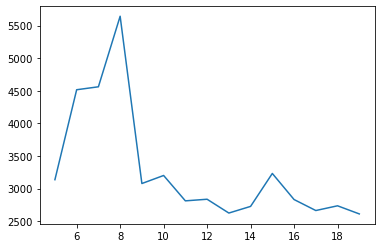

In [72]:
plt.plot(np.arange(5,20,1), tab_MAE)

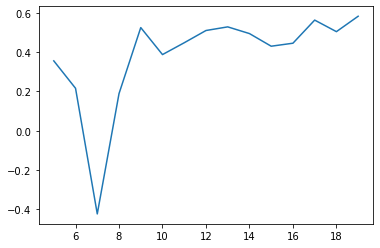

In [73]:
plt.plot(np.arange(5,20,1), tab_R2)

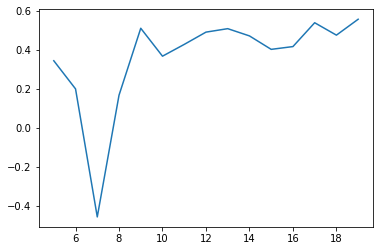

In [74]:
plt.plot(np.arange(5,20,1), tab_R2_ADJ)

# We saw above that it is with 20 months of trading that we have the best results. So, for the rest, we will make sure to have 20 months.